In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter, MaxNLocator
import scienceplots
from src.environments import GridWorldEnv
from src.agents.dp import BackwardPropagation, FrontPolicyImprovement, BackPolicyImprovement


In [2]:
from src.plots import plot_wireless

plot_wireless()

FileNotFoundError: [Errno 2] No such file or directory: 'results/dqn2.npy'

In [22]:
from src.agents.dqn import DFHqn, Dqn
from src.agents.fhtlr import FHMaxTlr, FHTlr
from src.agents.ql import QLearning, FHQLearning
from src.agents.bf import FHLinear
from src.agents.rbf import RBF, FHRBF
from src.utils import Discretizer

GAMMA = 0.9
H = 5
C = 3

DISCRETIZER = Discretizer(
    min_points_states=[0, 0, 0, 0, 0, 0, 0, 0],
    max_points_states=[10, 10, 10, 1, 1, 1, 10, 10],
    bucket_states=[10, 10, 10, 2, 2, 2, 10, 10],
    min_points_actions=[0, 0, 0],
    max_points_actions=[2, 2, 2],
    bucket_actions=[10, 10, 10],
)

#Experiments
EPISODES = 60_000
BUFFER_SIZE = 1_000
ALPHA_DQN = 0.01
ALPHA_FHRBF = 0.1
ALPHA_LINEAR = 0.1
ALPHA_FHTLR = 0.01
ALPHA_FHTLR_MAX = 0.01
ALPHA_QL = 10
K = 20
SCALE = 0.5
W_DECAY = 0.0
EPS_DECAY = (0.99999)**(20_000/40_000)
SCALE_QL = 0.1

num_params = []

agent = Dqn(DISCRETIZER, ALPHA_DQN, GAMMA, BUFFER_SIZE)
num_params_value_network = sum(p.numel() for p in agent.Q.parameters())
print(f'Número de parámetros en DQN: {num_params_value_network}')
num_params.append(num_params_value_network)
agent = DFHqn(DISCRETIZER, ALPHA_DQN, H, BUFFER_SIZE)
num_params_value_network = sum(p.numel() for p in agent.Q.parameters())
print(f'Número de parámetros en DFHqn: {num_params_value_network}')
num_params.append(num_params_value_network)
agent =  FHMaxTlr(DISCRETIZER, ALPHA_FHTLR_MAX, H, K, SCALE, w_decay=W_DECAY)
num_params_value_network = sum(p.numel() for p in agent.Q.parameters())
print(f'Número de parámetros en FHMaxTlr: {num_params_value_network}')
num_params.append(num_params_value_network)
agent = FHTlr(DISCRETIZER, ALPHA_FHTLR, H, K, SCALE, w_decay=W_DECAY)
num_params_value_network = sum(p.numel() for p in agent.Q.parameters())
print(f'Número de parámetros en FHTlr: {num_params_value_network}')
num_params.append(num_params_value_network)
agent = FHQLearning(DISCRETIZER, ALPHA_QL, H, SCALE_QL, 1000)
num_params_value_network = agent.Q.size
print(f'Número de parámetros en FHQLearning: {num_params_value_network}')
agent = FHRBF(DISCRETIZER, ALPHA_FHRBF, H, BUFFER_SIZE)
num_params.append(num_params_value_network)  
num_params_value_network = sum(p.numel() for p in agent.Q.parameters())
print(f'Número de parámetros en FHRBF: {num_params_value_network}')
num_params.append(num_params_value_network)

Número de parámetros en DQN: 33288
Número de parámetros en DFHqn: 165288
Número de parámetros en FHMaxTlr: 1820
Número de parámetros en FHTlr: 1820
Número de parámetros en FHQLearning: 4000000000
Número de parámetros en FHRBF: 30000


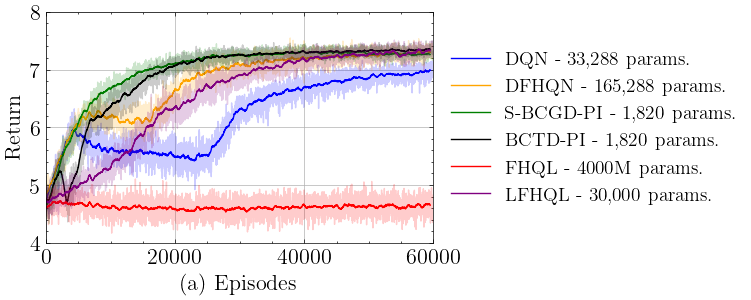

In [13]:
num_params = ["33,288","165,288","1,820","1,820","4000M","30,000"]
import matplotlib
import scienceplots
import matplotlib.ticker as ticker
#dqn = Gs_dqn[n1:n2,:]
dqn3 = np.load("results/wireless/e0.999995/wireless_dqn-explore.npy")
dfhqn = np.load("results/wireless/e0.999995/wireless_dfhqn-explore.npy")
fhtlr_max = np.load("results/wireless/e0.999995/wireless_fhtlr_max-explore-lr05.npy")
fhtlr_true = np.load("results/wireless/e0.999995/wireless_fhtlr_true-explore.npy")
fhql = np.load("results/wireless/e0.999995/wireless_fhql-explore.npy")
fhrbf = np.load("results/wireless/e0.999995/wireless_fhrbf.npy")

mu_dqn3 = np.mean(dqn3, axis=0)
mu_dfhqn = np.mean(dfhqn, axis=0)
mu_fhtlr_max = np.mean(fhtlr_max, axis=0)
mu_fhtlr_true = np.mean(fhtlr_true, axis=0)
mu_fhql = np.mean(fhql, axis=0)
mu_fhrbf = np.mean(fhrbf, axis=0)
#mu_dqn = np.mean(dqn, axis=0)

w = 50

#mu_dqn_smt = [np.mean(mu_dqn[i - w : i]) for i in range(w, len(mu_dqn))]
mu_dfhqn_smt = [np.mean(mu_dfhqn[i - w : i]) for i in range(w, len(mu_dfhqn))]
mu_dqn_smt3 = [np.mean(mu_dqn3[i - w : i]) for i in range(w, len(mu_dqn3))]
mu_fhtlr_max_smt = [np.mean(mu_fhtlr_max[i - w : i]) for i in range(w, len(mu_fhtlr_max))]
mu_fhtlr_true_smt = [np.mean(mu_fhtlr_true[i - w : i]) for i in range(w, len(mu_fhtlr_true))]
mu_fhql_smt = [np.mean(mu_fhql[i - w : i]) for i in range(w, len(mu_fhql))]
mu_fhrbf_smt = [np.mean(mu_fhrbf[i - w : i]) for i in range(w, len(mu_fhrbf))]


with plt.style.context(["science"], ["ieee"]):
    matplotlib.rcParams.update({"font.size": 16})
    
    fig = plt.figure(figsize=[5, 3])
    ax = fig.add_subplot(111)
    x1 = np.arange(0, len(mu_dqn_smt3) * 10, 10)
    x2 = np.arange(0, len(mu_dqn3) * 10, 10)
    ax.plot(x1,mu_dqn_smt3, c="b", label=f"DQN - {num_params[0]} params.")
    ax.plot(x2,mu_dqn3, alpha=0.2, c="b")
    ax.plot(x1,mu_dfhqn_smt, c="orange", label=f"DFHQN - {num_params[1]} params.")
    ax.plot(x2,mu_dfhqn, alpha=0.2, c="orange")
    ax.plot(x1,mu_fhtlr_max_smt, c="g", label=f"S-BCGD-PI - {num_params[2]} params.")
    ax.plot(x2,mu_fhtlr_max, alpha=0.2, c="g")
    ax.plot(x1,mu_fhtlr_true_smt, c="k", label=f"BCTD-PI - {num_params[3]} params.")
    ax.plot(x2,mu_fhtlr_true, alpha=0.2, c="k")
    ax.plot(x1,mu_fhql_smt, c="r", label=f"FHQL - {num_params[4]} params.")
    ax.plot(x2,mu_fhql, alpha=0.2, c="r")
    ax.plot(x1,mu_fhrbf_smt, c="purple", label=f"LFHQL - {num_params[5]} params.")
    ax.plot(x2,mu_fhrbf, alpha=0.2, c="purple")
    
    ax.set_xlim(0, 60000)
    ax.set_ylim(4, 8)
    ax.grid()
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=14)
    ax.set_xlabel("(a) Episodes")
    ax.set_ylabel("Return")
    
    # Configurar notación científica en el eje y
    ax.yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
    ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    
    plt.show()
    #plt.savefig("figures/wireless.jpg", dpi=300)


In [9]:
from src.agents.dqn import DFHqn, Dqn
from src.agents.fhtlr import FHMaxTlr, FHTlr
from src.agents.ql import QLearning, FHQLearning
from src.agents.bf import FHLinear
from src.agents.rbf import RBF, FHRBF
from src.utils import Discretizer

GAMMA = 0.99

#Experiments
EPISODES = 20_000
BUFFER_SIZE = 1_000
ALPHA_DQN = 0.1
ALPHA_FHTLR_max = 0.1
ALPHA_FHTLR_true = 0.05
ALPHA_QL = 10
ALPHA_FHRBF = 0.1
ALPHA_LINEAR = 0.1
K = 50
SCALE_max = 0.5
SCALE_true = 0.1
SCALE_QL = 0.01
W_DECAY = 0.0
EPS_DECAY = (0.9999)**(30_000/EPISODES)
#N_EXPS = 100
H = 5
DISCRETIZER = Discretizer(
    min_points_states=[0, 0, 0, 0],
    max_points_states=[1, 1, 1, 1],
    bucket_states=[10, 10, 10, 10],
    min_points_actions=[0, 0, 0],
    max_points_actions=[1, 1, 1],
    bucket_actions=[10, 10, 10],
)

num_params = []

agent = Dqn(DISCRETIZER, ALPHA_DQN, GAMMA, BUFFER_SIZE)
num_params_value_network = sum(p.numel() for p in agent.Q.parameters())
print(f'Número de parámetros en DQN: {num_params_value_network}')
num_params.append(num_params_value_network)
agent = DFHqn(DISCRETIZER, ALPHA_DQN, H, BUFFER_SIZE)
num_params_value_network = sum(p.numel() for p in agent.Q.parameters())
print(f'Número de parámetros en DFHqn: {num_params_value_network}')
num_params.append(num_params_value_network)
agent = FHMaxTlr(DISCRETIZER, ALPHA_FHTLR_max, H, K, SCALE_max, w_decay=W_DECAY)
num_params_value_network = sum(p.numel() for p in agent.Q.parameters())
print(f'Número de parámetros en FHMaxTlr: {num_params_value_network}')
num_params.append(num_params_value_network)
agent = FHTlr(DISCRETIZER, ALPHA_FHTLR_true, H, K, SCALE_true, w_decay=W_DECAY)
num_params_value_network = sum(p.numel() for p in agent.Q.parameters())
print(f'Número de parámetros en FHTlr: {num_params_value_network}')
num_params.append(num_params_value_network)
agent = FHQLearning(DISCRETIZER, ALPHA_QL, H, SCALE_QL, 1000)
num_params_value_network = agent.Q.size
print(f'Número de parámetros en FHQLearning: {num_params_value_network}')
agent = FHRBF(DISCRETIZER, ALPHA_FHRBF, H, BUFFER_SIZE)
num_params.append(num_params_value_network)  
num_params_value_network = sum(p.numel() for p in agent.Q.parameters())
print(f'Número de parámetros en FHRBF: {num_params_value_network}')
num_params.append(num_params_value_network)


Número de parámetros en DQN: 33160
Número de parámetros en DFHqn: 165160
Número de parámetros en FHMaxTlr: 3750
Número de parámetros en FHTlr: 3750
Número de parámetros en FHQLearning: 50000000
Número de parámetros en FHRBF: 30000


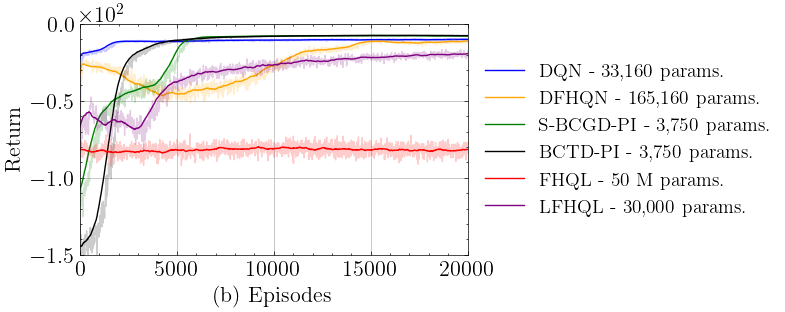

In [15]:
import matplotlib
import scienceplots

num_params = ["33,160","165,160","3,750","3,750","50 M","30,000"]

dqn3 = np.load("results/battery/battery_dqn-120.npy")
dfhqn = np.load("results/battery/battery_dfhqn-120.npy")
fhtlr_max = np.load("results/battery/battery_fhtlr_max-120.npy")
fhtlr_true = np.load("results/battery/battery_fhtlr_true-100.npy")
fhql = np.load("results/battery/battery_fhql-100.npy")
fhrbf = np.load("results/battery/battery_fhrbf-100.npy")

mu_dqn3 = np.mean(dqn3, axis=0)
mu_dfhqn = np.mean(dfhqn, axis=0)
mu_fhtlr_max = np.mean(fhtlr_max, axis=0)
mu_fhtlr_true = np.mean(fhtlr_true, axis=0)
mu_fhql = np.mean(fhql, axis=0)
mu_fhrbf = np.mean(fhrbf, axis=0)

w = 50

mu_dqn_smt3 = [np.mean(mu_dqn3[i - w : i]) for i in range(w, len(mu_dqn3))]
mu_dfhqn_smt = [np.mean(mu_dfhqn[i - w : i]) for i in range(w, len(mu_dfhqn))]
mu_fhtlr_max_smt = [np.mean(mu_fhtlr_max[i - w : i]) for i in range(w, len(mu_fhtlr_max))]
mu_fhtlr_true_smt = [np.mean(mu_fhtlr_true[i - w : i]) for i in range(w, len(mu_fhtlr_true))]
mu_fhql_smt = [np.mean(mu_fhql[i - w : i]) for i in range(w, len(mu_fhql))]
mu_fhrbf_smt = [np.mean(mu_fhrbf[i - w : i]) for i in range(w, len(mu_fhrbf))]


with plt.style.context(["science"], ["ieee"]):
    matplotlib.rcParams.update({"font.size": 16})

    fig = plt.figure(figsize=[5, 3])
    ax = fig.add_subplot(111)

    x1 = np.arange(0, len(mu_dqn_smt3) * 10, 10)
    x2 = np.arange(0, len(mu_dqn3) * 10, 10)

    ax.plot(x1,mu_dqn_smt3, c="b", label=f"DQN - {num_params[0]} params.")
    ax.plot(x2,mu_dqn3, alpha=0.2, c="b")
    ax.plot(x1,mu_dfhqn_smt, c="orange", label=f"DFHQN - {num_params[1]} params.")
    ax.plot(x2,mu_dfhqn, alpha=0.2, c="orange")
    ax.plot(x1,mu_fhtlr_max_smt, c="g", label=f"S-BCGD-PI - {num_params[2]} params.")
    ax.plot(x2,mu_fhtlr_max, alpha=0.2, c="g")
    ax.plot(x1,mu_fhtlr_true_smt, c="k", label=f"BCTD-PI - {num_params[3]} params.")
    ax.plot(x2,mu_fhtlr_true, alpha=0.2, c="k")
    ax.plot(x1,mu_fhql_smt, c="r", label=f"FHQL - {num_params[4]} params.")
    ax.plot(x2,mu_fhql, alpha=0.2, c="r")
    ax.plot(x1,mu_fhrbf_smt, c="purple", label=f"LFHQL - {num_params[5]} params.")
    ax.plot(x2,mu_fhrbf, alpha=0.2, c="purple")

    ax.set_xlim(0, 20000)
    ax.set_ylim(-150, 0)
    ax.grid()
    ax.set_xlabel("(b) Episodes")
    ax.set_ylabel("Return")
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=14)

    # Configurar notación científica en el eje y
    ax.yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
    ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))

    plt.show()
    #plt.savefig("figures/battery.jpg", dpi=300)

In [63]:
from PIL import Image

# Cargar las dos imágenes
img1 = Image.open('figures/wireless.jpg')
img2 = Image.open('figures/battery.jpg')

# Verificar que las imágenes se hayan cargado correctamente
if img1 is None or img2 is None:
    raise ValueError("Una o ambas imágenes no se pudieron cargar. Verifica las rutas.")

# Redimensionar las imágenes si es necesario para que tengan el mismo tamaño
width = img1.size[0] + img2.size[0]
height = img2.size[1] 
mosaic = Image.new("RGB", (width,height), "WHITE")

# Crear una imagen mosaico
mosaic.paste(img1, (0, img2.size[1]-img1.size[1] ))  # Esquina superior izquierda
mosaic.paste(img2, (img1.size[0], 0)) 
# Guardar la imagen resultante
mosaic.save("figures/experiments.jpg")

In [16]:
from PIL import Image

# Cargar las dos imágenes
img1 = Image.open('figures/wireless.jpg')
img2 = Image.open('figures/battery.jpg')

# Verificar que las imágenes se hayan cargado correctamente
if img1 is None or img2 is None:
    raise ValueError("Una o ambas imágenes no se pudieron cargar. Verifica las rutas.")

# Redimensionar las imágenes si es necesario para que tengan el mismo tamaño
width = img1.size[0]
height = img2.size[1] + img1.size[1] 
mosaic = Image.new("RGB", (width,height), "WHITE")

# Crear una imagen mosaico
mosaic.paste(img1, (0, 0 ))  # Esquina superior izquierda
mosaic.paste(img2, (0, img1.size[1])) 
# Guardar la imagen resultante
mosaic.save("figures/experiments.jpg")

In [40]:
(0.99999)**(20_000/40_000)

0.9999949999875